This case requires us to develop customer segmentation to define marketing strategies. The dataset summarizes the usage behavior of about 9000 active credit card holders in a 6 months period. The file is at a customer level with 18 behavioral variables.

<img src='credit_card.jpg' alt='Credit Card Img'>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#Reading the input file
df = pd.read_csv('CC GENERAL.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
df.set_index('CUST_ID', inplace=True)

In [4]:
# Checking if duplicate data exists
sum(df.index.value_counts()!=1)

0

In [5]:
df.info() # 8950 rows, 17 cols

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT         

In [6]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

Ranges of the variables are quite different, so we need to normalize the data for clustering.

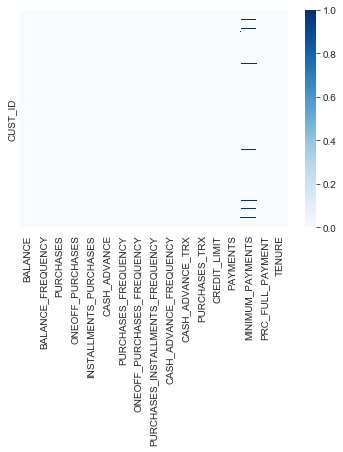

In [7]:
# Heatmap to visualize missing values in the data
sns.heatmap(df.isnull(), cmap='Blues', yticklabels=False)
plt.show()

Missing values in MINIMUM_PAYMENTS

In [8]:
df.isnull().sum().sort_values(ascending=False)[:3]

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
TENURE                0
dtype: int64

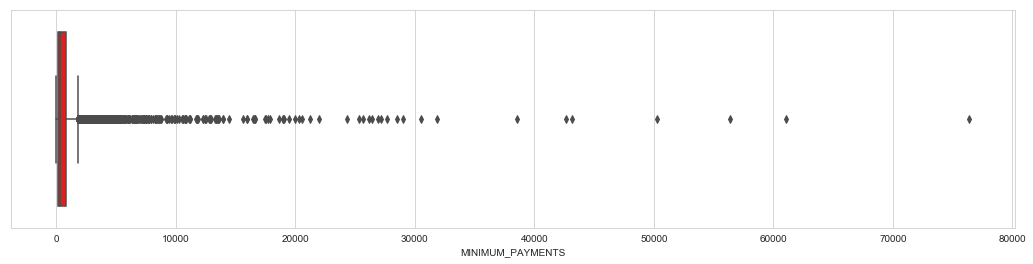

In [9]:
# Boxplot to check distribution of MINIMUM_PAYMENTS
plt.figure(figsize=(18,4))
sns.boxplot(df['MINIMUM_PAYMENTS'], color='red')
plt.show()

The column has a lot of extreme outliers, so imputing missing values with mean is not a good choice.

Let's check its correlation with other columns.

In [10]:
# Computing Pearson and Spearman correlation coefficients of MINIMUM_PAYMENTS with other columns
cor = df.corrwith(df['MINIMUM_PAYMENTS'], method='pearson').abs().sort_values(ascending=False)
cor = cor.apply(lambda x: round(x,2))
cor = cor.reset_index()
cor.columns = ['Feature','Pearson_coeff']
cor2 = df.corrwith(df['MINIMUM_PAYMENTS'], method='spearman').abs().sort_values(ascending=False)
cor2 = cor2.apply(lambda x: round(x,2))
cor2 = cor2.reset_index()
cor2.columns = ['Feature','Spearman_coeff']
cor.merge(cor2, on='Feature').set_index('Feature')[:4]

Pearson_coeff  Spearman_coeff
Feature                                        
MINIMUM_PAYMENTS           1.00            1.00
BALANCE                    0.40            0.90
PRC_FULL_PAYMENT           0.14            0.48
CASH_ADVANCE               0.14            0.48

MINIMUM_PAYMENTS has strong monotonic relation (as indicated by the high Spearman correlation) with BALANCE. However the relation is not strongly linear (as indicated by the relatively low value of the Pearson correlation). We can take the help of this column to impute missing values.

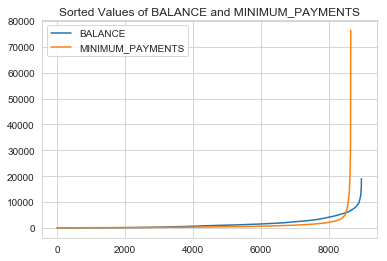

In [11]:
# Plotting MINIMUM_PAYMENTS and BALANCE to observe the monotonic relationship
plt.plot(list(range(df.shape[0])), df['BALANCE'].sort_values(), label='BALANCE')
plt.plot(list(range(df.shape[0])), df['MINIMUM_PAYMENTS'].sort_values(), label='MINIMUM_PAYMENTS')
plt.legend()
plt.title('Sorted Values of BALANCE and MINIMUM_PAYMENTS')
plt.show()

Fitting a polynomial regression model to predict values of MINIMUM_PAYMENTS using values of BALANCE

In [12]:
# Imports for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
# Train-Test split
dftrain = df[df['MINIMUM_PAYMENTS'].isnull()==False]
dftest = df[df['MINIMUM_PAYMENTS'].isnull()]

X= np.array(dftrain['BALANCE']).reshape(-1, 1)
y= np.array(dftrain['MINIMUM_PAYMENTS'])

X_test = np.array(dftest['BALANCE']).reshape(-1, 1)

In [14]:
# Fitting polynomial models of various degrees and calculating the Root Mean Squared Error (RMSE) on train.
err = {}
for i in range(1,8):
    poly = PolynomialFeatures(degree=i)
    X_ = poly.fit_transform(X)
    clf = LinearRegression()
    clf.fit(X_, y)
    preds = clf.predict(X_)
    err[str(i)] = round(np.sqrt(mean_squared_error(y, preds)), 3)

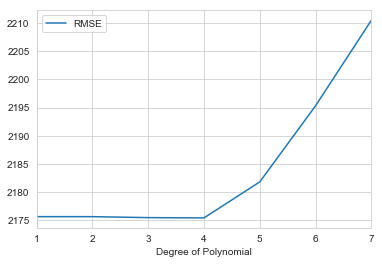

In [15]:
# Plotting the errors.
err = pd.DataFrame(err, index=[0]).T
err.columns = ['RMSE']
err.plot()
plt.xlabel('Degree of Polynomial')
plt.show()

In [16]:
# Fitting the model with degree=4 and imputing missing values.
poly = PolynomialFeatures(degree=4)
X_ = poly.fit_transform(X)
clf = LinearRegression()
clf.fit(X_, y)

X_test_ =  poly.fit_transform(X_test)
preds = clf.predict(X_test_)
dftest['MINIMUM_PAYMENTS'] = preds

df = pd.concat([dftrain, dftest], axis=0).sort_index()

N:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


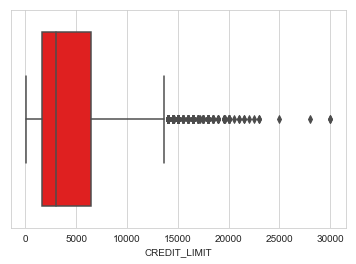

In [17]:
# Checking distribution of CREDIT_LIMIT which has 1 missing value.
sns.boxplot(df['CREDIT_LIMIT'], color='red') #Again imputation by mean not a good option
plt.show()

In [18]:
# Imputing using median value
df['CREDIT_LIMIT'].fillna(value= df['CREDIT_LIMIT'].median(), inplace=True)

In [19]:
# Checking for missing values again
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
# Datatypes of columns
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### Exploratory Data Analysis

In [21]:
df_copy = df.copy()

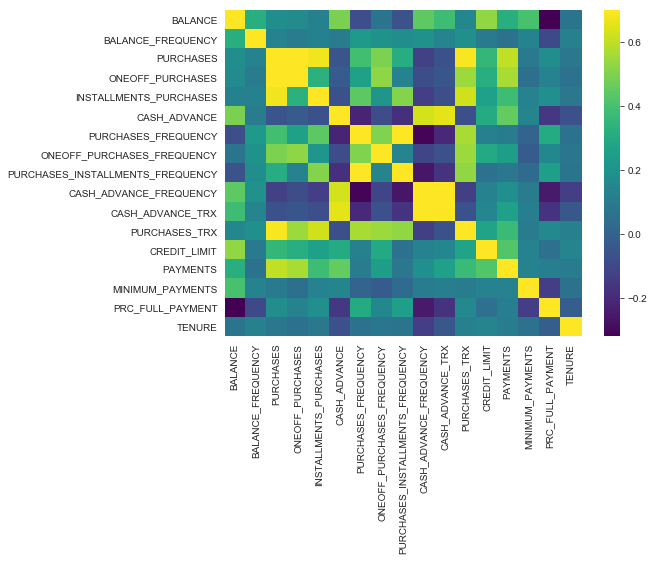

In [22]:
# Heatmap of the Pearson correlation between each pair of features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='viridis', vmax=0.70) # I set vmax=0.7 to easily spot correlations greater than or close to 0.7
plt.show()

When variables used in clustering are correlated, some
variables get a higher weight than others. If two variables are
perfectly correlated, they effectively represent the same concept.
But that concept is now represented twice in the data and hence
gets twice the weight of all the other variables. The final solution is
likely to be skewed in the direction of that concept.

Checking some correlation values-

In [23]:
df.corrwith(df['PURCHASES']).sort_values(ascending=False)[:5]

PURCHASES                 1.000000
ONEOFF_PURCHASES          0.916845
PURCHASES_TRX             0.689561
INSTALLMENTS_PURCHASES    0.679896
PAYMENTS                  0.603264
dtype: float64

In [24]:
df.corrwith(df['PURCHASES_FREQUENCY']).sort_values(ascending=False)[:5]

PURCHASES_FREQUENCY                 1.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.862934
PURCHASES_TRX                       0.568430
ONEOFF_PURCHASES_FREQUENCY          0.501343
INSTALLMENTS_PURCHASES              0.442418
dtype: float64

In [25]:
df.corrwith(df['CASH_ADVANCE_TRX']).sort_values(ascending=False)[:5]

CASH_ADVANCE_TRX          1.000000
CASH_ADVANCE_FREQUENCY    0.799561
CASH_ADVANCE              0.656498
BALANCE                   0.385152
PAYMENTS                  0.255278
dtype: float64

In [26]:
# Function to get unique correlations from the correlation matrix
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top n absolute correlation values and corresponding columns
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [27]:
print("Top Absolute Correlations \n")
print(get_top_abs_correlations(df, 5))

Top Absolute Correlations 

PURCHASES               ONEOFF_PURCHASES                    0.916845
PURCHASES_FREQUENCY     PURCHASES_INSTALLMENTS_FREQUENCY    0.862934
CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX                    0.799561
PURCHASES               PURCHASES_TRX                       0.689561
                        INSTALLMENTS_PURCHASES              0.679896
dtype: float64


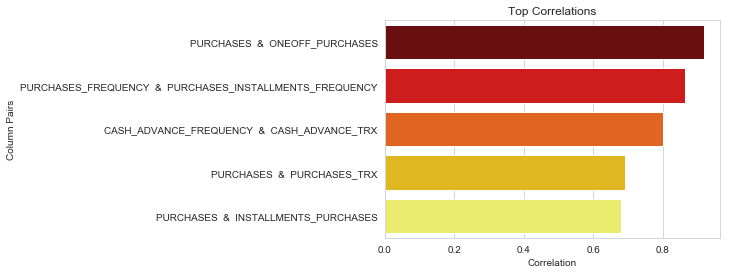

In [28]:
# Visualization of the top correlated variables
x = get_top_abs_correlations(df, 5)
x = x.reset_index()
x.columns = ['Column_1', 'Column_2', 'Correlation' ]
x['Column Pairs'] = x['Column_1'] + '  &  ' + x['Column_2']
sns.barplot(x='Correlation', y='Column Pairs', data=x, palette='hot')
plt.title('Top Correlations')
plt.show()

Very high correlation between PURCHASES and ONEOFF_PURCHASES

### Instead of dropping variables and losing information, Principal Component Analysis (PCA) is also used later, which helps to preserve information and at the same time get independent variables.

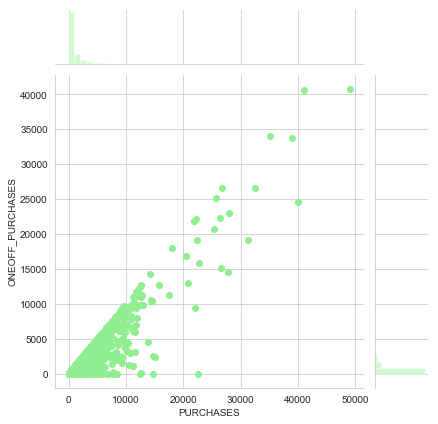

In [29]:
# Jointplot to visualize the high correlation between PURCHASES and ONEOFF_PURCHASES
sns.jointplot(x='PURCHASES', y='ONEOFF_PURCHASES', data=df, color='lightgreen')
plt.show()

In [30]:
df[['PURCHASES', 'ONEOFF_PURCHASES']].head(5)

PURCHASES  ONEOFF_PURCHASES
CUST_ID                             
C10001       95.40              0.00
C10002        0.00              0.00
C10003      773.17            773.17
C10004     1499.00           1499.00
C10005       16.00             16.00

In the first row, PURCHASES=95.40 but ONEOFF_PURCHASES=0,  -- i.e. purchases have been done by the customer but maximum purchase amount is zero, which seems strange till we see the next column- INSTALLMENTS_PURCHASES. The customer made all purchases on installments, hence his ONEOFF_PURCHASE=0

In [31]:
df[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].head(5)

PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
CUST_ID                                                     
C10001       95.40              0.00                    95.4
C10002        0.00              0.00                     0.0
C10003      773.17            773.17                     0.0
C10004     1499.00           1499.00                     0.0
C10005       16.00             16.00                     0.0

Infact, PURCHASES is the sum of ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES.
* We can drop the PURCHASES column for our analysis.

In [32]:
df.drop('PURCHASES', axis=1, inplace=True)

High correlation between PURCHASE_FREQUENCY and PURCHASE_INSTALLEMENTS_FREQUENCY suggests that most purchases are being paid on installments.

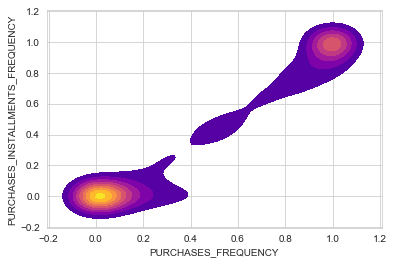

In [33]:
# KDE plot to visualize high correlation between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY
sns.kdeplot( df['PURCHASES_FREQUENCY'], df['PURCHASES_INSTALLMENTS_FREQUENCY'],
                 cmap="plasma", shade=True, shade_lowest=False)
plt.show()

In [34]:
# Dropping PURCHASES_INSTALLMENTS_FREQUENCY
df.drop('PURCHASES_INSTALLMENTS_FREQUENCY', axis=1, inplace=True)

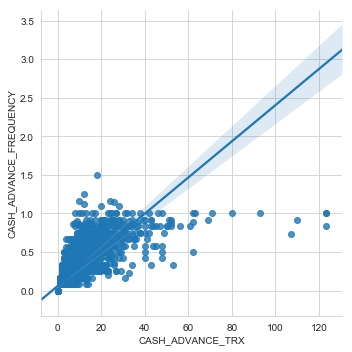

In [35]:
# Plot to visualize linear relationship between CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY
sns.lmplot(x='CASH_ADVANCE_TRX', y='CASH_ADVANCE_FREQUENCY', data=df)

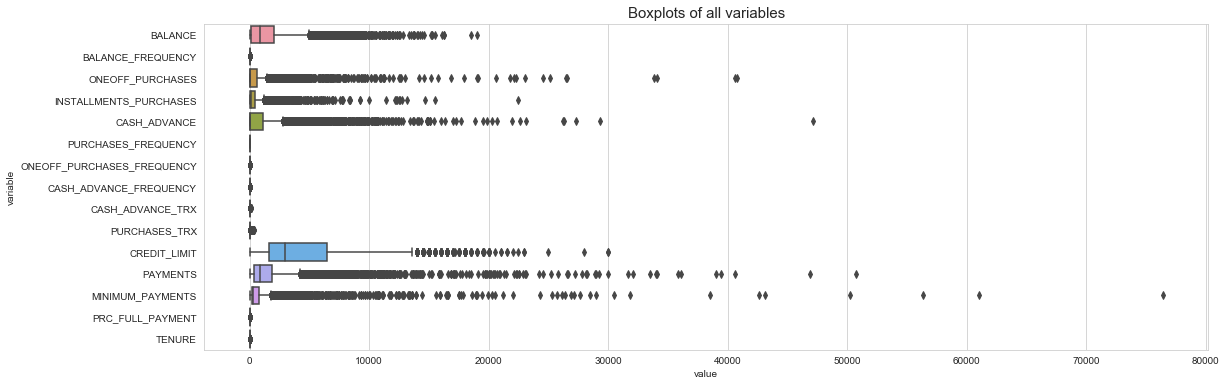

In [36]:
# Plotting Boxplots of all our features to get idea of distribution and outliers
plt.figure(figsize=(18,6))
sns.boxplot(x="value", y="variable", data=pd.melt(df))
plt.title('Boxplots of all variables', size=15)
plt.show()

### Many of our features have outliers, but these seem to be natural outliers and not generated because of some error in measurements. For example: It is possible that someone made a very expensive ONEOFF_PURCHASE.

K-means is sensitive to outliers, so it may be better to use a density based clustering approach which is robust to noise like DBSCAN. We will hovever try out both the approaches.

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns, index=df.index)
df.head()

N:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
N:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
N:\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
CUST_ID                                                  
C10001  -0.731989          -0.249434         -0.356934   
C10002   0.786961           0.134325         -0.356934   
C10003   0.447135           0.518084          0.108889   
C10004   0.049099          -1.016953          0.546189   
C10005  -0.358775           0.518084         -0.347294   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                -0.349079     -0.466786            -0.806490   
C10002                -0.454576      2.605605            -1.221758   
C10003                -0.454576     -0.466786             1.269843   
C10004                -0.454576     -0.368653            -1.014125   
C10005                -0.454576     -0.466786            -1.014125   

         ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
CUST_ID                                                                         
C10001                    -0.678661               -0.675349         -0.476070   
C10002                    -0.678661                0.573963          0.110074   
C10003                     2.673451               -0.675349         -0.476070   
C10004                    -0.399319               -0.258913         -0.329534   
C10005                    -0.399319               -0.675349         -0.476070   

         PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
CUST_ID                                                            
C10001       -0.511333     -0.960378 -0.528979         -0.303092   
C10002       -0.591796      0.688678  0.818642          0.096450   
C10003       -0.109020      0.826100 -0.383805         -0.094173   
C10004       -0.551565      0.826100 -0.598688          0.033205   
C10005       -0.551565     -0.905410 -0.364368         -0.257999   

         PRC_FULL_PAYMENT   TENURE  
CUST_ID                             
C10001          -0.525551  0.36068  
C10002           0.234227  0.36068  
C10003          -0.525551  0.36068  
C10004          -0.525551  0.36068  
C10005          -0.525551  0.36068

In [39]:
# Replacing extreme outliers with 99th and 1st percentiles for each variable
df_kmeans = df.copy()
for i in df_kmeans.columns:
    ulimit = np.percentile(df_kmeans[i].values, 99)
    llimit = np.percentile(df_kmeans[i].values, 1)
    df_kmeans[i].loc[df_kmeans[i]>ulimit] = ulimit
    df_kmeans[i].loc[df_kmeans[i]<llimit] = llimit

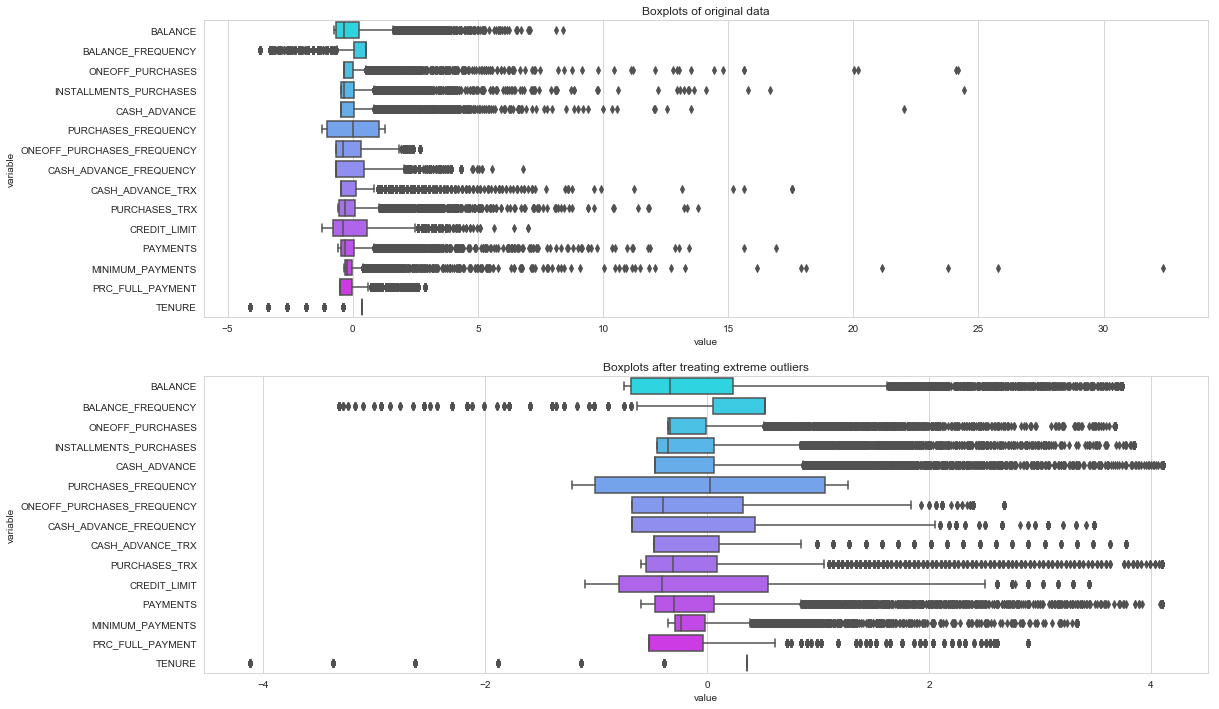

In [40]:
# Comparison of Boxplots before and after treating outliers
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,12) )
sns.boxplot(x="value", y="variable", data=pd.melt(df), ax=ax[0], palette='cool')
ax[0].title.set_text('Boxplots of original data')

sns.boxplot(x="value", y="variable", data=pd.melt(df_kmeans), ax=ax[1], palette='cool')
ax[1].title.set_text('Boxplots after treating extreme outliers')
plt.show()

### PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
scaler = StandardScaler()
scaler.fit(df_copy)
scaled_df = pd.DataFrame(scaler.fit_transform(df_copy), columns= df_copy.columns, index=df_copy.index)
scaled_df.head()

N:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
N:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
N:\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                             
C10001  -0.731989          -0.249434  -0.424900         -0.356934   
C10002   0.786961           0.134325  -0.469552         -0.356934   
C10003   0.447135           0.518084  -0.107668          0.108889   
C10004   0.049099          -1.016953   0.232058          0.546189   
C10005  -0.358775           0.518084  -0.462063         -0.347294   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                -0.349079     -0.466786            -0.806490   
C10002                -0.454576      2.605605            -1.221758   
C10003                -0.454576     -0.466786             1.269843   
C10004                -0.454576     -0.368653            -1.014125   
C10005                -0.454576     -0.466786            -1.014125   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                    -0.678661                         -0.707313   
C10002                    -0.678661                         -0.916995   
C10003                     2.673451                         -0.916995   
C10004                    -0.399319                         -0.916995   
C10005                    -0.399319                         -0.916995   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                -0.675349         -0.476070      -0.511333   
C10002                 0.573963          0.110074      -0.591796   
C10003                -0.675349         -0.476070      -0.109020   
C10004                -0.258913         -0.329534      -0.551565   
C10005                -0.675349         -0.476070      -0.551565   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
CUST_ID                                                                       
C10001      -0.960378 -0.528979         -0.303092         -0.525551  0.36068  
C10002       0.688678  0.818642          0.096450          0.234227  0.36068  
C10003       0.826100 -0.383805         -0.094173         -0.525551  0.36068  
C10004       0.826100 -0.598688          0.033205         -0.525551  0.36068  
C10005      -0.905410 -0.364368         -0.257999         -0.525551  0.36068

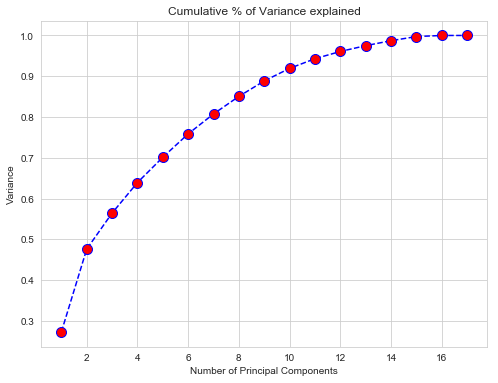

In [43]:
#Fitting the PCA algorithm to our data
pca = PCA().fit(scaled_df)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(8,6))
plt.plot(list(range(1, df_copy.shape[1]+1)), np.cumsum(pca.explained_variance_ratio_), color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance') #for each component
plt.title('Cumulative % of Variance explained')
plt.show()

In [44]:
# Cumulative Variance values
print(np.cumsum(pca.explained_variance_ratio_))

[0.27299367 0.47624546 0.56447054 0.63934854 0.70136657 0.75875633
 0.80760818 0.85066719 0.88853039 0.91932986 0.94305232 0.9607632
 0.97502695 0.98720056 0.99732885 0.99999931 1.        ]


We could choose 15 principal component but we don't need to do dimensionality reduction, we just want independent features. We will use all 17 principal components.

In [45]:
# PCA transformed dataset
cols=[]
for i in range(1,df_copy.shape[1]+1):
    cols.append('PC_' + str(i))

df_pca = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(df_pca, columns=cols, index= df_copy.index)
df_pca.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
CUST_ID                                                                         
C10001  -1.684383 -1.071351  0.470101  0.683801  0.049709  0.069163  0.821673   
C10002  -1.132776  2.508860  0.606057 -0.110747  0.683865 -1.087112 -0.390001   
C10003   0.969224 -0.383799  0.081859  1.250073 -2.162751 -0.364336 -1.530902   
C10004  -0.871690  0.049171  1.430112  1.186353  0.345224 -0.088404 -0.286884   
C10005  -1.600428 -0.682603  0.339777  1.019987 -0.445016  0.069476  0.697379   

             PC_8      PC_9     PC_10     PC_11     PC_12     PC_13     PC_14  \
CUST_ID                                                                         
C10001  -0.010190  0.118802 -0.077668 -0.236024 -0.052414 -0.082289 -0.187714   
C10002   0.190288  0.670529 -0.776971 -0.870904 -0.607310 -0.032923 -0.735331   
C10003  -0.273899 -0.851670 -0.002513 -0.761893  0.686506  0.694018  0.042076   
C10004  -0.541023 -0.136129  0.392907  0.742260  0.160649 -0.166066 -0.426024   
C10005   0.256335  0.576389 -0.121088 -0.454985 -0.110196 -0.036148 -0.040369   

            PC_15     PC_16     PC_17  
CUST_ID                                
C10001   0.150192  0.048230 -0.000160  
C10002  -0.530585 -0.082735  0.000003  
C10003   0.222401  0.511434  0.000022  
C10004  -0.110314 -0.019985 -0.000002  
C10005   0.291383 -0.070565 -0.000081

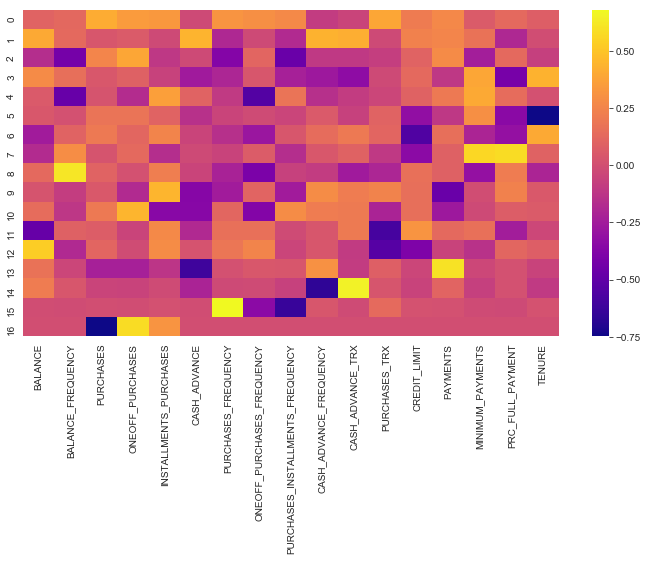

In [46]:
#Interpreting the share of each feature in forming the Principal Components
df_comp = pd.DataFrame(pca.components_, columns=df_copy.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')
plt.show()

## K-means

Now we have Outliers and Correlated variables in check.

Another challenge with k-means is the Initial Centroid problem- We can get different clusters for different initial centroids.
<br>Ways to deal with this inlcude-
* Multiple runs of k-means with different initial centroids and choosing the best set of clusters.
* Post-processing of the clusters (Example: Splitting loose clusters, merging small clusters, checking for empty clusters).
* Finding initial centroids using Bisecting k-means algorithm and then proceeding with k means.
* Using kmeans++ algorithm for smart seeding.

Also, kmeans can fail when natural clusters have non-globular shapes or are of different sizes or densities.

In [47]:
# Imports for kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [48]:
# k-means with 10 different centroid seeds
# (init= 'k-means++' : selects initial cluster centers in a smart way to speed up convergence)

In [49]:
# Function to help us do cluster analysis using Silhouette plots and calculate the WSS (Within cluster Sum of Squared error)
# and Silhouette scores for different values of k (number of clusters).

def kmeans_analysis(df_kmeans, random_state=101):
    
    range_n_clusters = list(range(2,11))
    silhouette_scores = []
    wss = []
    
    # Taking 2 Principal Components for the dataset for purpose of visualization
    pca = PCA().fit(df_kmeans)
    X = pca.fit_transform(df_kmeans)
    
    # Looping through the values of k
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state= random_state)
        cluster_labels = clusterer.fit_predict(df_kmeans)

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(df_kmeans, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", round(silhouette_avg,2))
        
        # Appending silhouette score and within cluster squared error to seperate lists for the particular k value
        silhouette_scores.append(silhouette_avg)
        wss.append(clusterer.inertia_)
        
        # Silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df_kmeans, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        ax2.set_title("Visualization of the clustered data on 1st and 2nd PC")
        ax2.set_xlabel("Feature space for PC_1")
        ax2.set_ylabel("Feature space for PC_2")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return silhouette_scores, wss

In [50]:
# Function to plot WSS and Silhouette scores vs No. of clusters
def make_plots(wss, silhouette_scores):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
    
    ax1.plot(range(2, 11), wss, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
    ax1.set_title('Elbow method- WSS vs k', size=13)
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Within Cluster Sum of Squares (WSS)') #within cluster sum of squares
    
    ax2.plot(range(2, 11), silhouette_scores, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=8)
    ax2.set_title('Silhouette Scores vs k', size=13)
    ax2.set_xlabel('Number of clusters (k)')
    ax2.set_ylabel('Silhouette Coefficient')
    
    plt.suptitle(('Choosing k value for kmeans'),
             fontsize=14, fontweight='bold')
    plt.show()

**Silhouette coefficient**: It takes into account both Cohesion and Seperation between clusters. It is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b)

For n_clusters = 2 The average silhouette_score is : 0.26
For n_clusters = 3 The average silhouette_score is : 0.24
For n_clusters = 4 The average silhouette_score is : 0.2
For n_clusters = 5 The average silhouette_score is : 0.21
For n_clusters = 6 The average silhouette_score is : 0.2
For n_clusters = 7 The average silhouette_score is : 0.21
For n_clusters = 8 The average silhouette_score is : 0.2
For n_clusters = 9 The average silhouette_score is : 0.19
For n_clusters = 10 The average silhouette_score is : 0.2


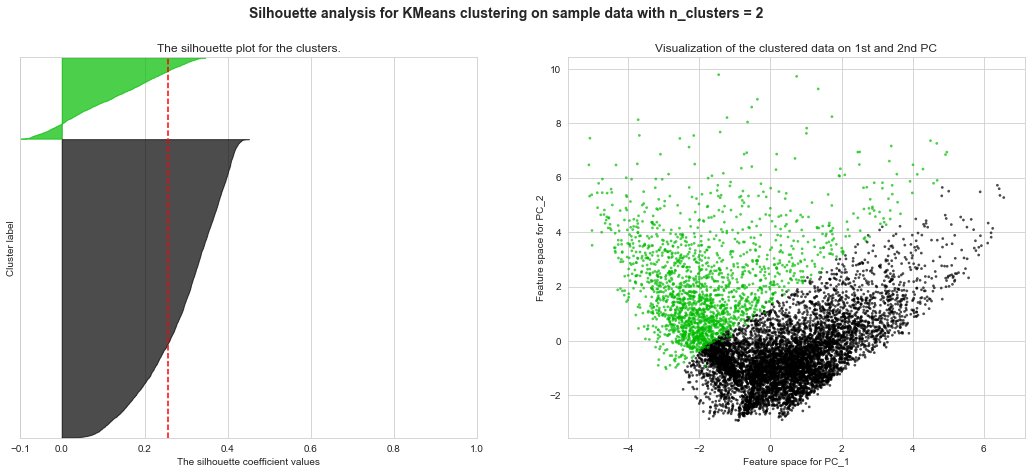

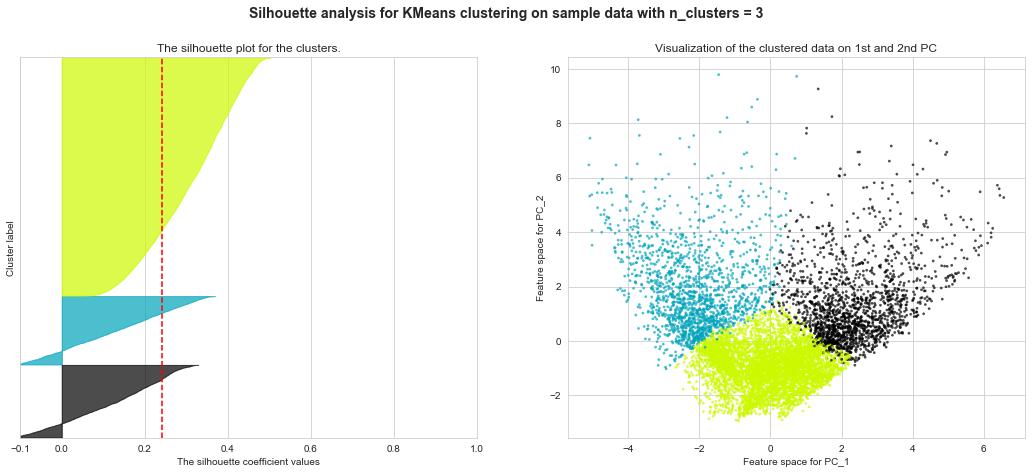

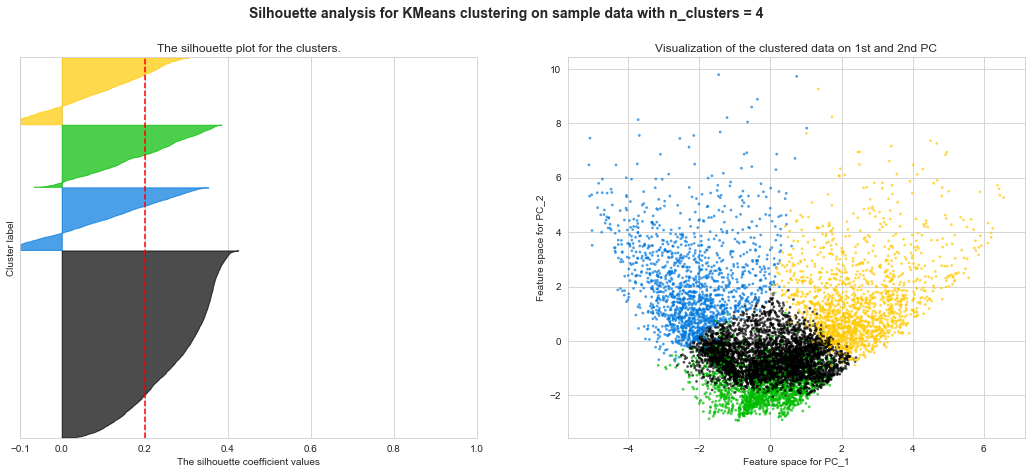

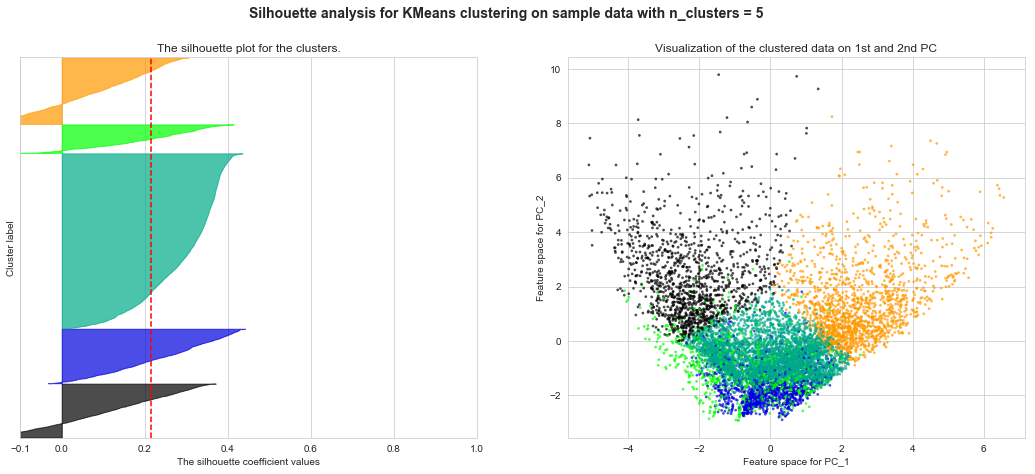

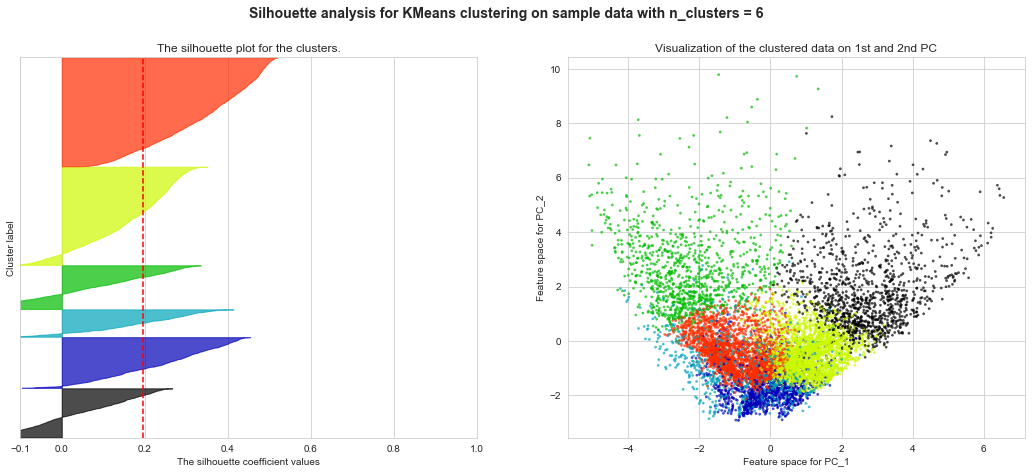

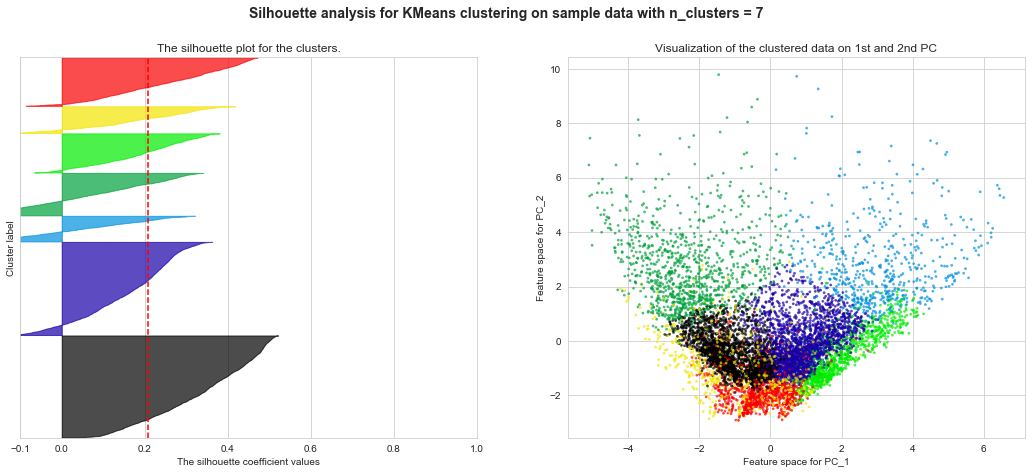

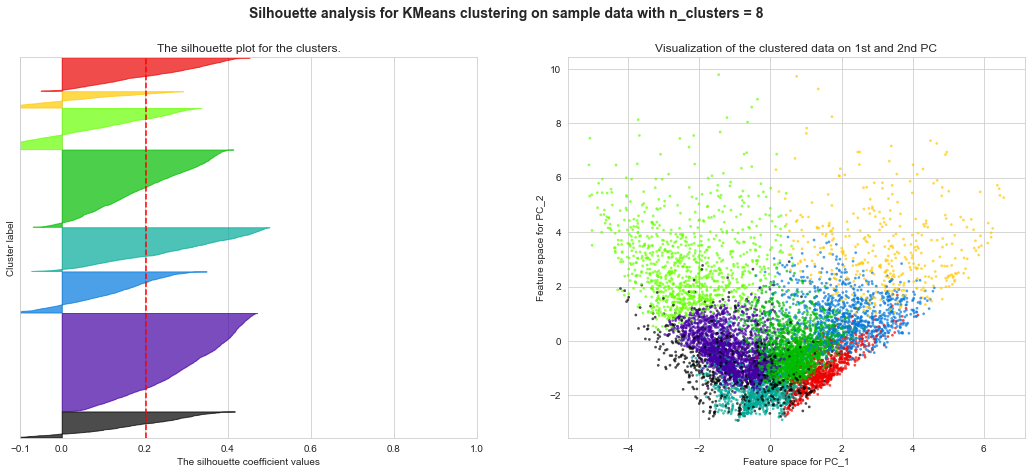

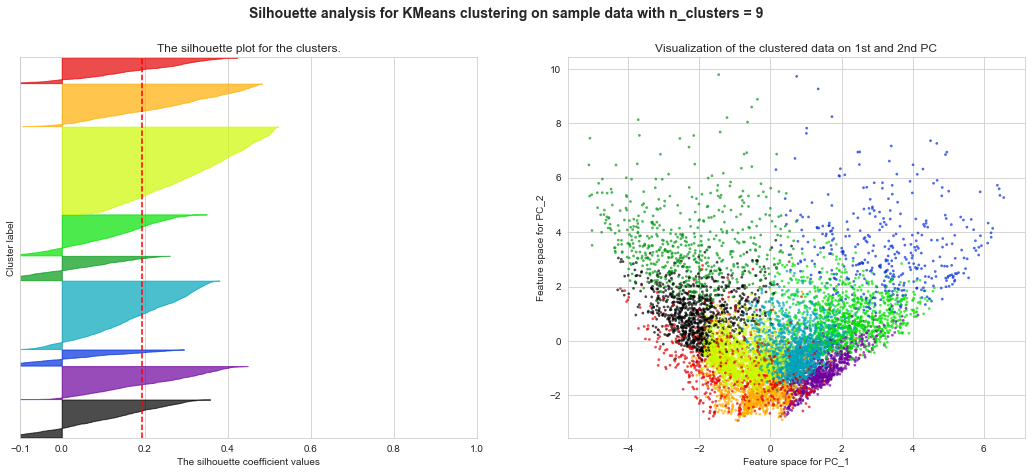

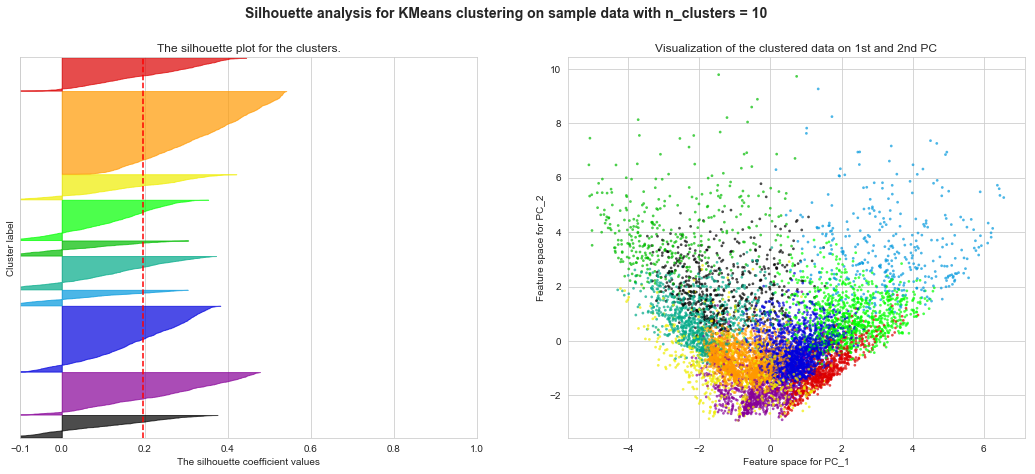

In [51]:
silhouette_scores, wss = kmeans_analysis(df_kmeans)

The **Silhouette plots** can be interpreted as follows:
* For all samples in a cluster, the Silhouette scores are calculated, arranged in descending order and indicated on the plot.
* Since the plot shows the scores of all samples in a cluster, we also get an idea of the size of each obtained cluster by observing the plot. 
* The red vertical line represents the overall average Silhouette of all the samples (in all clusters).
* If a particular cluster does not cross the red line, it means that the scores for all its samples is less than the average Silhouette score. This represents poor clustering.
* A Silhouette score near 1 represents perfect clustering, while a score near 0 indicates overlapping clusters. A negative score indicates poor clustering.

<br> **Note that the right plots showing the clusters were obtained by reducing the dataset to 2 dimensions using PCA, just for the purpose of visualization.**

For choosing the value of k, we will interpret the Silhouette plots obtained above and plots of Within cluster Sum of Squared error (WSS) vs k and Silhouette scores vs K.

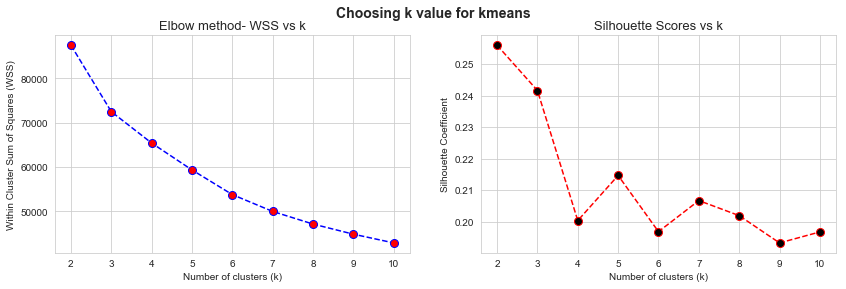

In [52]:
make_plots(wss, silhouette_scores)

A peak appears at k=5 in the right graph. 
<br>When we examine the Silhouette plot for k=5, we see that all clusters have points with above average Silhouette score, which is a good sign. But some clusters also have points with negative scores which represents poor clustering. We can also observe that we obtain one big cluster and four almost equal sized clusters.

k=3 is also an option. There is an elbow in the left graph and Silhouette score in the right graph is high too.
<br> The final value of k can be decided by assistance of domain experts.

## Interpretation of clusters

Let's try to do some analysis of the clusters obtained with k=3

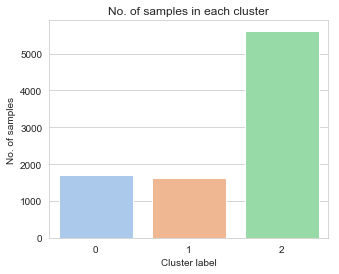

In [53]:
# Visualizing cluster sizes
km = KMeans(n_clusters=3, random_state=101)
km.fit(df_kmeans)
x = pd.Series(km.labels_).value_counts().sort_index().reset_index()
x.columns= ['Cluster label', 'No. of samples']
#x.set_index('Cluster label', inplace=True)
plt.figure(figsize=(5,4))
plt.title("No. of samples in each cluster")
sns.barplot(x='Cluster label', y='No. of samples', data=x, palette='pastel')
plt.show()

In [54]:
# Appending labels to the dataframe
df_kmeans['kmeans_label'] = km.labels_
df_kmeans.head()

BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
CUST_ID                                                  
C10001  -0.731989          -0.249434         -0.356934   
C10002   0.786961           0.134325         -0.356934   
C10003   0.447135           0.518084          0.108889   
C10004   0.049099          -1.016953          0.546189   
C10005  -0.358775           0.518084         -0.347294   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                -0.349079     -0.466786            -0.806490   
C10002                -0.454576      2.605605            -1.221758   
C10003                -0.454576     -0.466786             1.269843   
C10004                -0.454576     -0.368653            -1.014125   
C10005                -0.454576     -0.466786            -1.014125   

         ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
CUST_ID                                                                         
C10001                    -0.678661               -0.675349         -0.476070   
C10002                    -0.678661                0.573963          0.110074   
C10003                     2.673451               -0.675349         -0.476070   
C10004                    -0.399319               -0.258913         -0.329534   
C10005                    -0.399319               -0.675349         -0.476070   

         PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
CUST_ID                                                            
C10001       -0.511333     -0.960378 -0.528979         -0.303092   
C10002       -0.591796      0.688678  0.818642          0.096450   
C10003       -0.109020      0.826100 -0.383805         -0.094173   
C10004       -0.551565      0.826100 -0.598688          0.033205   
C10005       -0.551565     -0.905410 -0.364368         -0.257999   

         PRC_FULL_PAYMENT   TENURE  kmeans_label  
CUST_ID                                           
C10001          -0.525551  0.36068             2  
C10002           0.234227  0.36068             1  
C10003          -0.525551  0.36068             0  
C10004          -0.525551  0.36068             2  
C10005          -0.525551  0.36068             2

**Stategy: To get an idea of how our data has been grouped using Kmeans, we will discretize our variables into 3 buckets each and try to identify key differences between the different clusters.**

For the Binning purpose, we will do kmeans based binning of each variable instead of equal width or equal frequency based binning. This seems logical once we look back at the Boxplots of all our features.

In [55]:
df_kmeans.head()

BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
CUST_ID                                                  
C10001  -0.731989          -0.249434         -0.356934   
C10002   0.786961           0.134325         -0.356934   
C10003   0.447135           0.518084          0.108889   
C10004   0.049099          -1.016953          0.546189   
C10005  -0.358775           0.518084         -0.347294   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                -0.349079     -0.466786            -0.806490   
C10002                -0.454576      2.605605            -1.221758   
C10003                -0.454576     -0.466786             1.269843   
C10004                -0.454576     -0.368653            -1.014125   
C10005                -0.454576     -0.466786            -1.014125   

         ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
CUST_ID                                                                         
C10001                    -0.678661               -0.675349         -0.476070   
C10002                    -0.678661                0.573963          0.110074   
C10003                     2.673451               -0.675349         -0.476070   
C10004                    -0.399319               -0.258913         -0.329534   
C10005                    -0.399319               -0.675349         -0.476070   

         PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
CUST_ID                                                            
C10001       -0.511333     -0.960378 -0.528979         -0.303092   
C10002       -0.591796      0.688678  0.818642          0.096450   
C10003       -0.109020      0.826100 -0.383805         -0.094173   
C10004       -0.551565      0.826100 -0.598688          0.033205   
C10005       -0.551565     -0.905410 -0.364368         -0.257999   

         PRC_FULL_PAYMENT   TENURE  kmeans_label  
CUST_ID                                           
C10001          -0.525551  0.36068             2  
C10002           0.234227  0.36068             1  
C10003          -0.525551  0.36068             0  
C10004          -0.525551  0.36068             2  
C10005          -0.525551  0.36068             2

In [56]:
# Binning our features into 3 bins each
binned = pd.DataFrame()
for i in df_kmeans.drop('kmeans_label', axis=1).columns:
    km = KMeans(n_clusters=3, random_state=101)
    km.fit(np.array(df_kmeans[i]).reshape(-1,1))
    binned[i]= km.labels_
binned['label'] = df_kmeans['kmeans_label'].values
binned.index = df_kmeans.index
binned.head()

BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
CUST_ID                                                                         
C10001         0                  0                 0                       0   
C10002         1                  0                 0                       0   
C10003         1                  0                 0                       0   
C10004         1                  1                 2                       0   
C10005         0                  0                 0                       0   

         CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
CUST_ID                                                                  
C10001              1                    0                           2   
C10002              2                    0                           2   
C10003              1                    1                           1   
C10004              1                    0                           2   
C10005              1                    0                           2   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                        0                 1              0   
C10002                        1                 1              0   
C10003                        0                 1              0   
C10004                        0                 1              0   
C10005                        0                 1              0   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
CUST_ID                                                                       
C10001              0         2                 1                 0       0   
C10002              2         0                 1                 2       0   
C10003              2         2                 1                 0       0   
C10004              2         2                 1                 0       0   
C10005              0         2                 1                 0       0   

         label  
CUST_ID         
C10001       2  
C10002       1  
C10003       0  
C10004       2  
C10005       2

0,1,2 represent Low, Medium, High values respectively.

In [57]:
import itertools

In [58]:
# Computing the counts of observations with Low/Med/High values for each feature and cluster.
counts = pd.DataFrame()
for i in binned.drop('label', axis=1).columns:
    for j in range(0,3):
        temp = binned[binned['label']==j]
        counts[i + '-Cluster' + str(j)] = temp[i].value_counts()
counts.sort_index(inplace=True)
counts.index = ['Low', 'Med', 'High']
counts= counts.T
counts['variable'] = list(itertools.chain.from_iterable(itertools.repeat(x, 3) for x in binned.drop('label', axis=1).columns))
counts['cluster'] = [0,1,2]*15
counts.set_index(['variable', 'cluster'], inplace=True)
counts

Low   Med  High
variable                   cluster                  
BALANCE                    0        1083   464   166
                           1         330   729   557
                           2        4795   812    14
BALANCE_FREQUENCY          0        1664    44     5
                           1        1521    85    10
                           2        4010   896   715
ONEOFF_PURCHASES           0         623   268   822
                           1        1460    15   141
                           2        5254     9   358
INSTALLMENTS_PURCHASES     0         788   672   253
                           1        1462   142    12
                           2        4984   600    37
CASH_ADVANCE               0         128  1578     7
                           1         945   308   363
                           2         385  5233     3
PURCHASES_FREQUENCY        0           3  1579   131
                           1        1080   274   262
                           2        2586  1565  1470
ONEOFF_PURCHASES_FREQUENCY 0         525  1007   181
                           1         242    64  1310
                           2         810    44  4767
CASH_ADVANCE_FREQUENCY     0        1444   247    22
                           1          69   827   720
                           2        4321  1278    22
CASH_ADVANCE_TRX           0         125  1580     8
                           1         957   251   408
                           2         495  5124     2
PURCHASES_TRX              0         312   394  1007
                           1        1431    25   160
                           2        5101     3   517
CREDIT_LIMIT               0         499   419   795
                           1         484   350   782
                           2        4411   174  1036
PAYMENTS                   0         635   145   933
                           1         432   164  1020
                           2         386    27  5208
MINIMUM_PAYMENTS           0         239  1430    44
                           1         651   910    55
                           2         295  5251    75
PRC_FULL_PAYMENT           0        1070   402   241
                           1        1551     7    58
                           2        4446   564   611
TENURE                     0        1667    22    24
                           1        1377   135   104
                           2        4905   433   283

Using the above dataframe, we can make interpretations like 
* People with low BALANCE tend to fall into Cluster2.
* People with med and high BALANCE_FREQUENCY tend to be in Cluster2.
* People with med ONEOFF_PURCHASES are mostly in Cluster0 and low ONEOFF_PURCHASES in Cluster2 

<br> Many more insights based on 2,3 or even more features can be derived. Domain experts can help a lot in the interpretation.

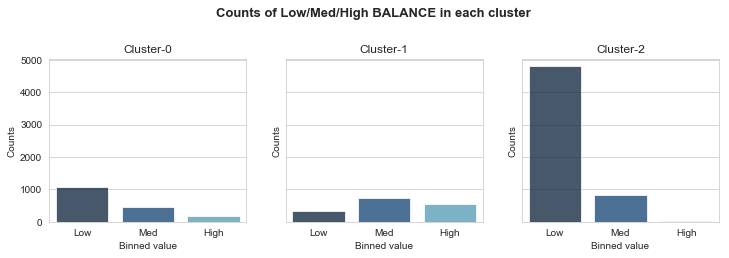

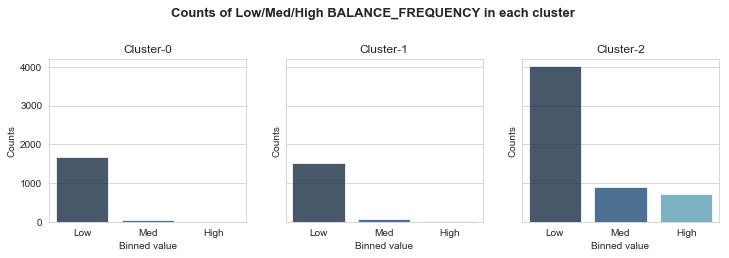

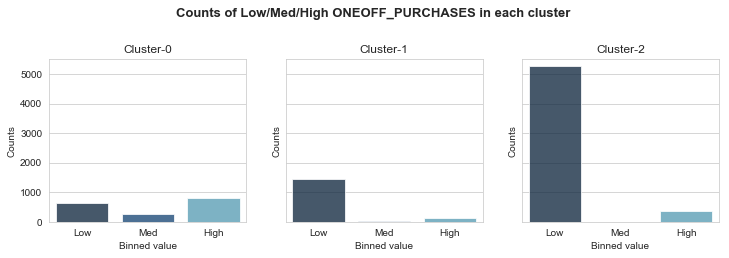

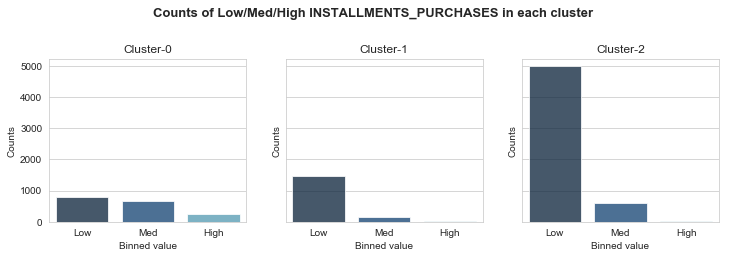

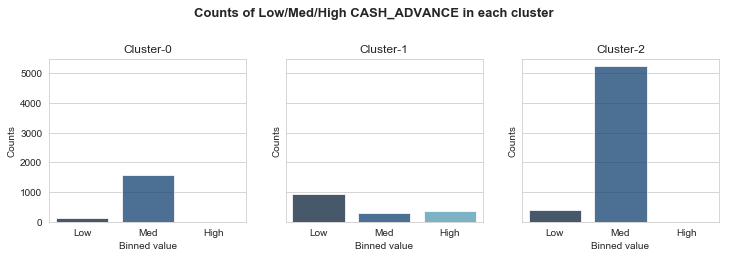

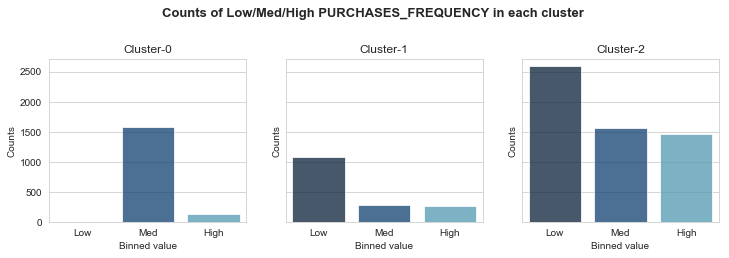

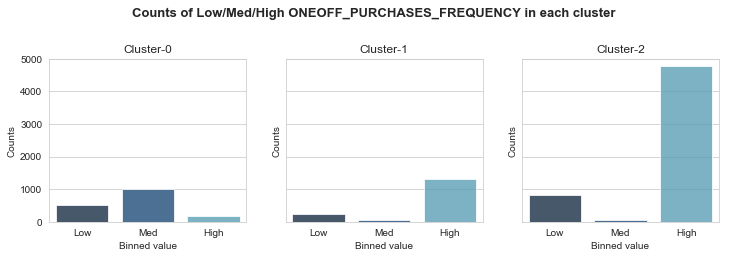

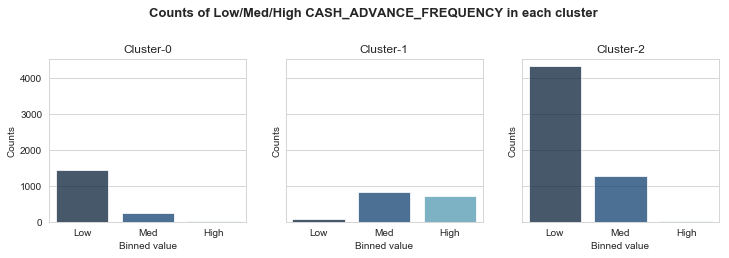

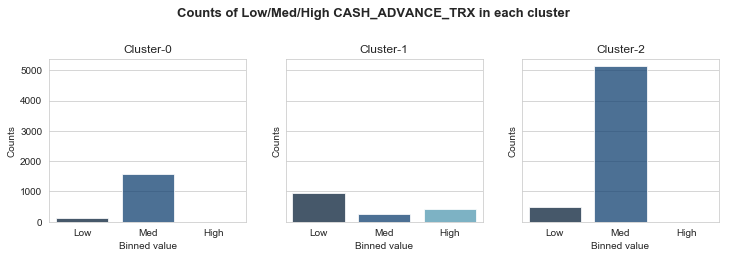

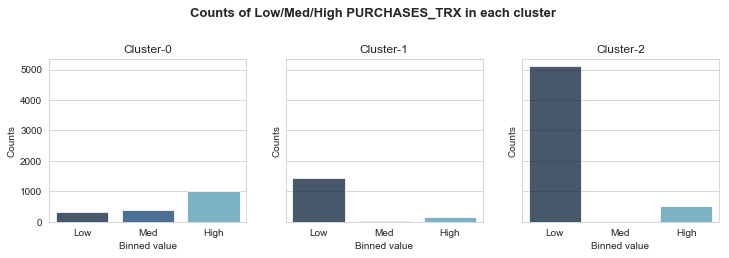

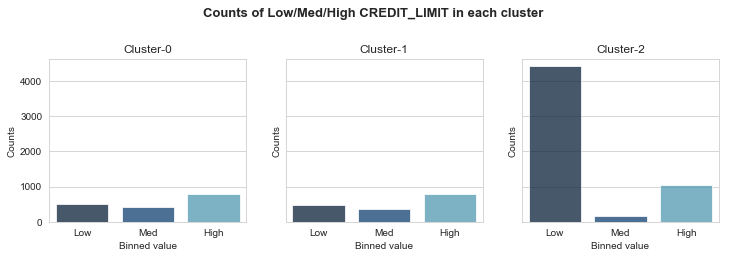

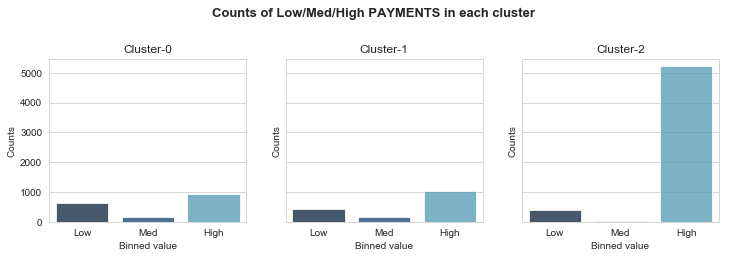

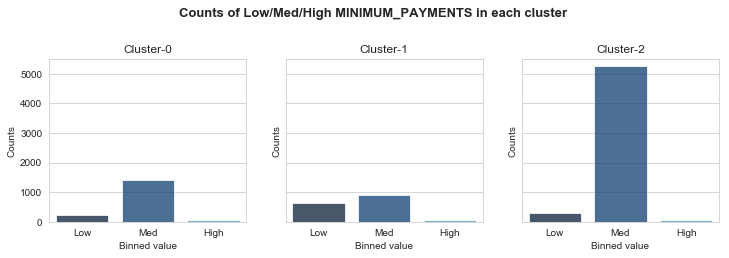

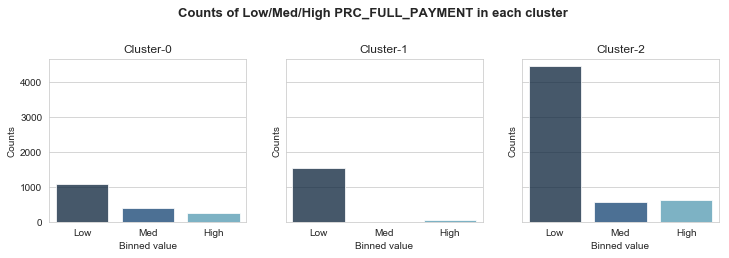

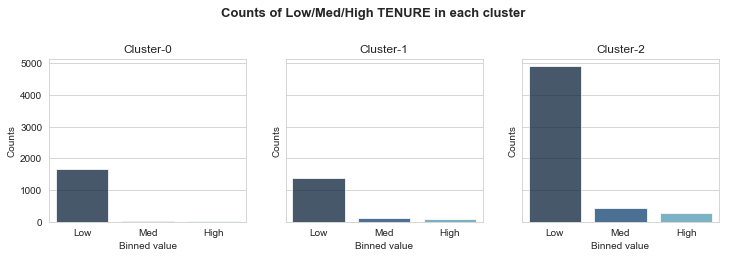

In [59]:
for col in df_kmeans.drop('kmeans_label', axis=1).columns:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3), sharey=True)
    for i in range(3):
        sns.barplot(y= counts.loc[(col, i)], x= counts.columns, palette='ocean', alpha=0.6, ax=ax[i])
        ax[i].set_xlabel('Binned value')
        ax[i].set_ylabel('Counts')
        ax[i].set_title('Cluster-{}'.format(i))
    plt.suptitle('Counts of Low/Med/High {} in each cluster'.format(col), size=13, fontweight='bold', y=1.12)
    plt.show()
    print('\n')

### Kmeans on PCA reduced dataset

In [60]:
df_pca.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
CUST_ID                                                                         
C10001  -1.684383 -1.071351  0.470101  0.683801  0.049709  0.069163  0.821673   
C10002  -1.132776  2.508860  0.606057 -0.110747  0.683865 -1.087112 -0.390001   
C10003   0.969224 -0.383799  0.081859  1.250073 -2.162751 -0.364336 -1.530902   
C10004  -0.871690  0.049171  1.430112  1.186353  0.345224 -0.088404 -0.286884   
C10005  -1.600428 -0.682603  0.339777  1.019987 -0.445016  0.069476  0.697379   

             PC_8      PC_9     PC_10     PC_11     PC_12     PC_13     PC_14  \
CUST_ID                                                                         
C10001  -0.010190  0.118802 -0.077668 -0.236024 -0.052414 -0.082289 -0.187714   
C10002   0.190288  0.670529 -0.776971 -0.870904 -0.607310 -0.032923 -0.735331   
C10003  -0.273899 -0.851670 -0.002513 -0.761893  0.686506  0.694018  0.042076   
C10004  -0.541023 -0.136129  0.392907  0.742260  0.160649 -0.166066 -0.426024   
C10005   0.256335  0.576389 -0.121088 -0.454985 -0.110196 -0.036148 -0.040369   

            PC_15     PC_16     PC_17  
CUST_ID                                
C10001   0.150192  0.048230 -0.000160  
C10002  -0.530585 -0.082735  0.000003  
C10003   0.222401  0.511434  0.000022  
C10004  -0.110314 -0.019985 -0.000002  
C10005   0.291383 -0.070565 -0.000081

For n_clusters = 2 The average silhouette_score is : 0.21
For n_clusters = 3 The average silhouette_score is : 0.25
For n_clusters = 4 The average silhouette_score is : 0.2
For n_clusters = 5 The average silhouette_score is : 0.19
For n_clusters = 6 The average silhouette_score is : 0.2
For n_clusters = 7 The average silhouette_score is : 0.21
For n_clusters = 8 The average silhouette_score is : 0.22
For n_clusters = 9 The average silhouette_score is : 0.22
For n_clusters = 10 The average silhouette_score is : 0.22


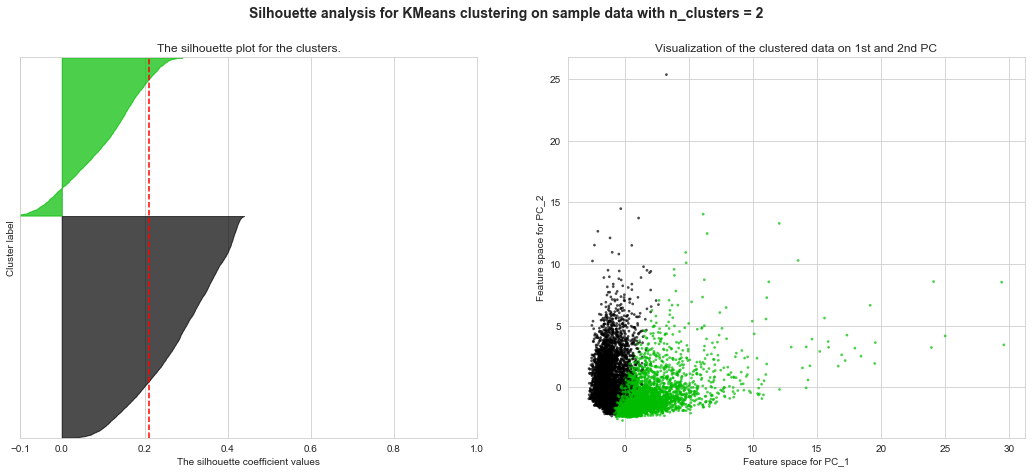

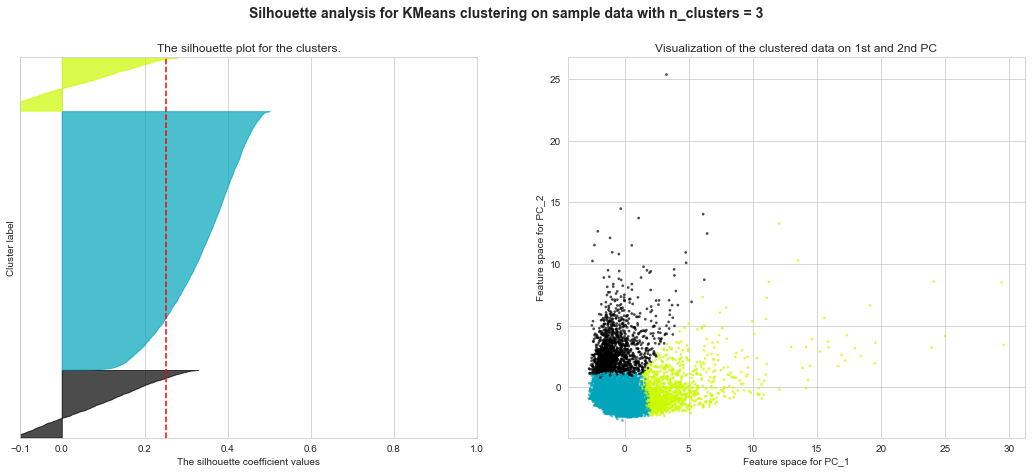

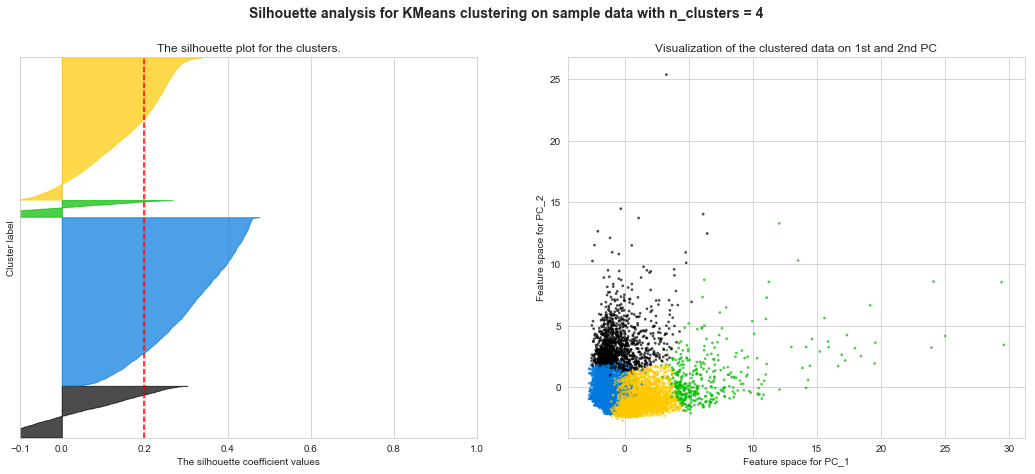

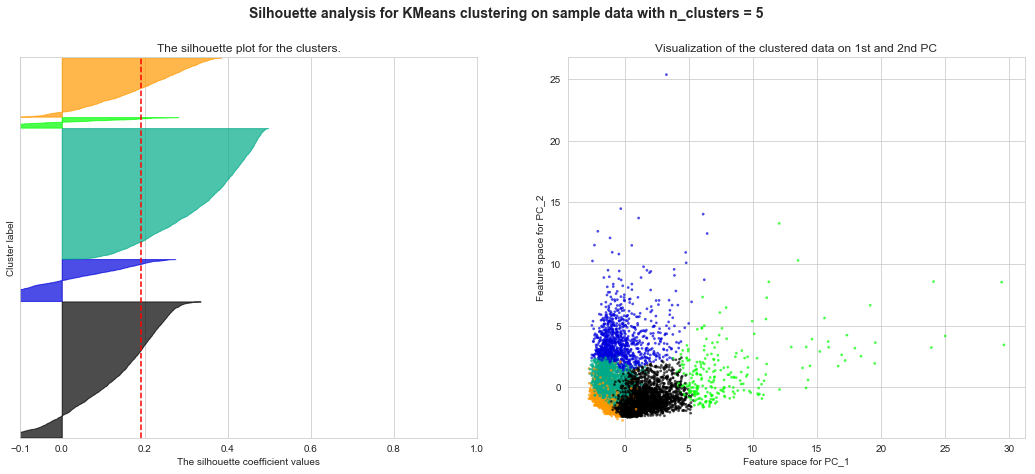

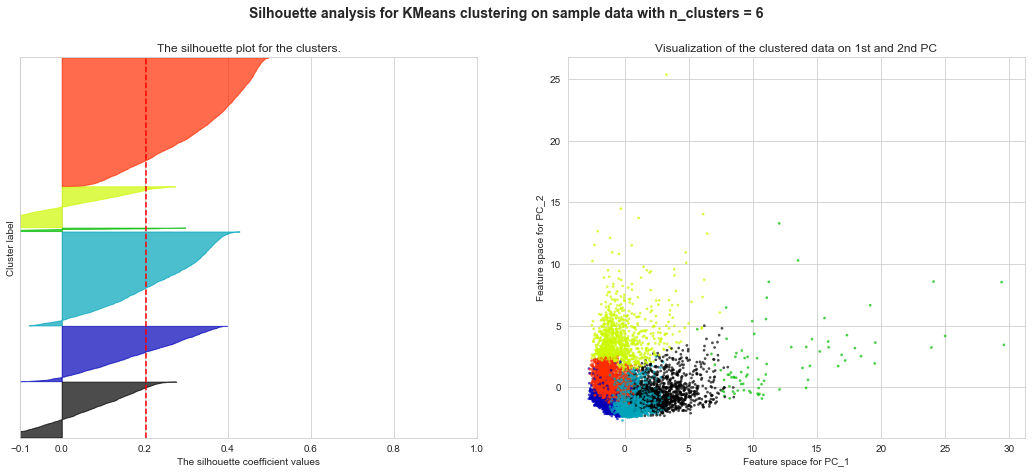

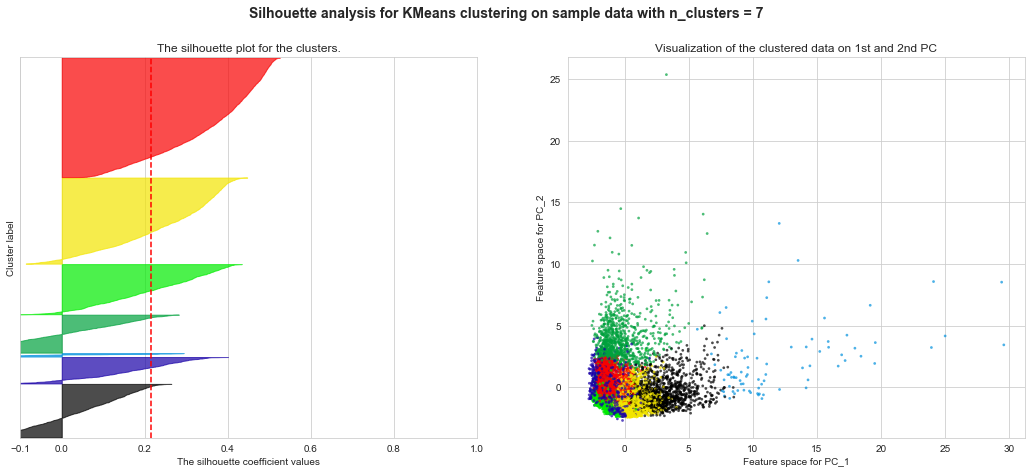

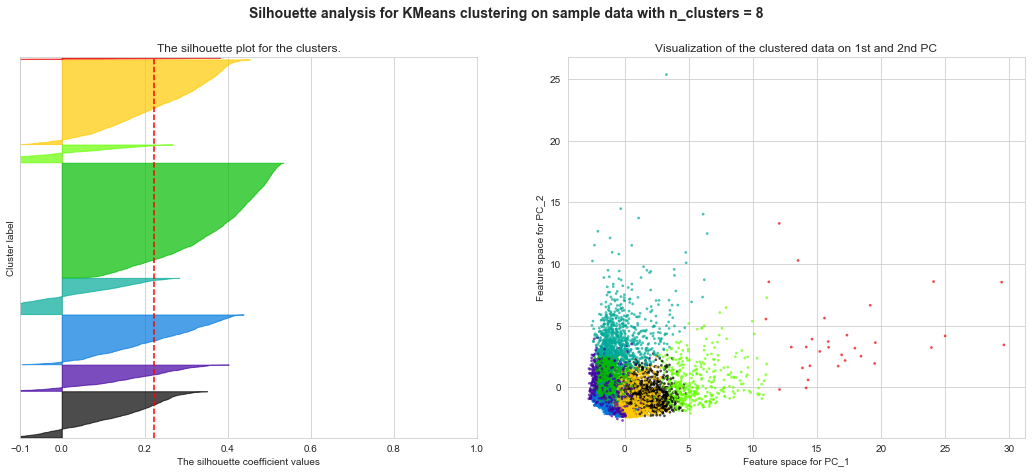

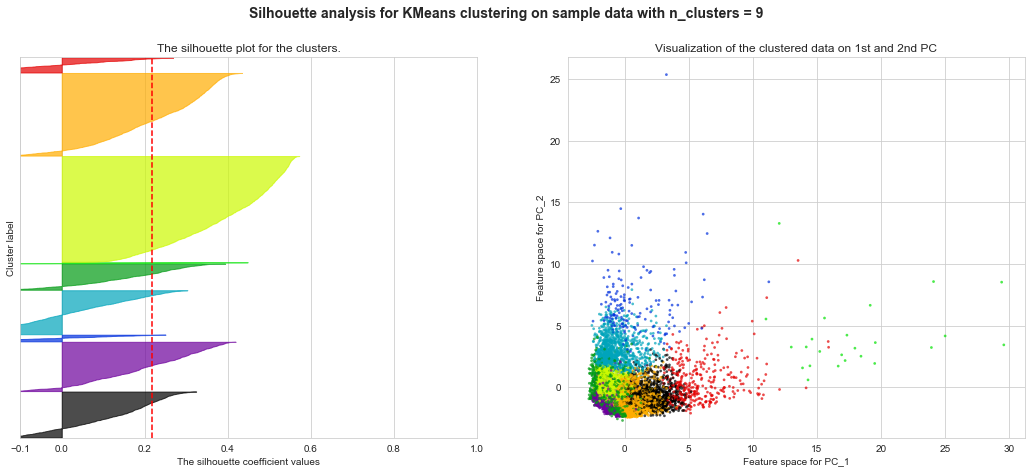

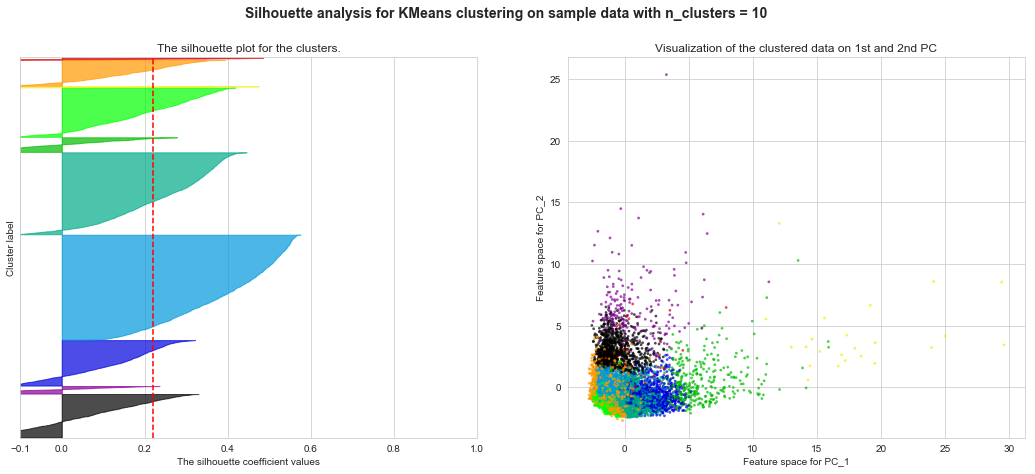

In [61]:
silhouette_scores_pca, wss_pca = kmeans_analysis(df_pca)

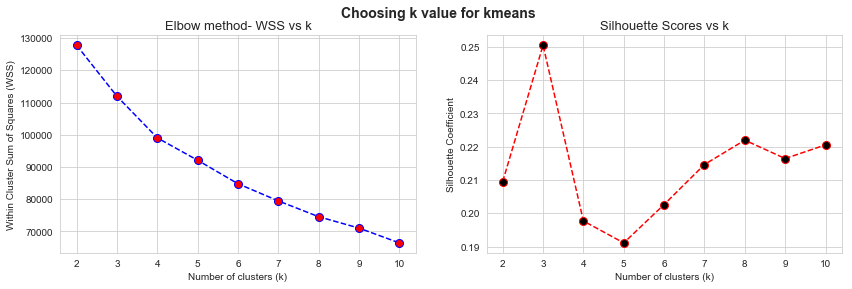

In [62]:
make_plots(wss_pca, silhouette_scores_pca)

A sharp peak in Silhouette score appears at k=3. Score at k=3 is 0.25 for the PCA dataset and 0.24 for original. 

Interpretation of the clusters is difficult as we are now using the principal components instead of the original features :(

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [63]:
# Imports for DBSCAN and computing distance matrix
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import squareform, pdist

In [64]:
# Distance matrix - will use this to help us find good DBSCAN parameters.
dist_mat = pd.DataFrame(squareform(pdist(df_kmeans.drop('kmeans_label', axis=1))), columns=df_kmeans.index, index=df_kmeans.index)
dist_mat.head()    

CUST_ID    C10001    C10002    C10003    C10004    C10005    C10006    C10007  \
CUST_ID                                                                         
C10001   0.000000  4.388715  4.601460  2.379640  0.945785  2.441030  8.109140   
C10002   4.388715  0.000000  5.619594  3.892350  4.191693  4.560042  7.972699   
C10003   4.601460  5.619594  0.000000  4.222227  4.328650  4.190379  5.968954   
C10004   2.379640  3.892350  4.222227  0.000000  2.581349  3.303976  7.247366   
C10005   0.945785  4.191693  4.328650  2.581349  0.000000  2.370266  7.964843   

CUST_ID    C10008    C10009    C10010  ...    C19181    C19182    C19183  \
CUST_ID                                ...                                 
C10001   2.474035  1.999603  3.148678  ...  6.085153  8.208290  5.075463   
C10002   4.722524  3.960622  4.464593  ...  7.211437  5.960489  6.708650   
C10003   3.719546  3.588484  4.277803  ...  6.947592  8.167456  6.085091   
C10004   3.351286  1.876330  1.495955  ...  6.694987  7.566708  5.787120   
C10005   2.462372  1.779043  3.432175  ...  6.138006  8.149708  5.135203   

CUST_ID    C19184    C19185    C19186    C19187    C19188    C19189    C19190  
CUST_ID                                                                        
C10001   4.717385  4.754042  5.291508  5.007937  4.859530  4.672143  5.577698  
C10002   6.571698  6.273345  6.767866  6.746601  6.564728  6.122980  6.827442  
C10003   6.504153  5.545947  6.269533  6.032431  6.144013  6.724819  5.589757  
C10004   5.102186  4.867582  5.983573  5.732972  5.487314  5.209045  5.656319  
C10005   4.991975  4.773471  5.350806  5.071349  5.014428  4.740172  5.672882  

[5 rows x 8950 columns]

In [65]:
# Function to plot sorted distances of each point from its K-th nearest neighbor.
def plot_k_dist(dist_mat, k):
    kdist = dist_mat.apply(lambda x: x.sort_values()[k], axis=1) # Distance of each point from its K-th nearest neighbor

    plt.plot(list(range(kdist.shape[0])), kdist.sort_values(), color='red')
    plt.xlabel('Data points')
    plt.ylabel('k-dist')
    plt.title('Sorted values of k-dist for k={}'.format(k))
    plt.show()

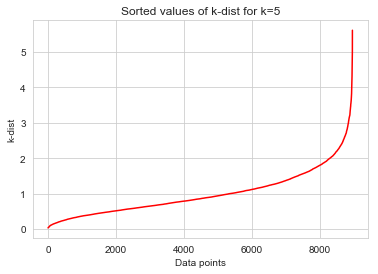

In [66]:
plot_k_dist(dist_mat, 5)

The above plot helps in choosing the epsilon parameter (radius) for a given value of k (min_samples parameter). We are interested in the value after which there is a sudden rise in the k-dist, equal to 2 in this case.

In [67]:
#Function to fit DBSCAN model for given parameters epsilon and min_samples(k), and print no. of data points in each cluster.
def try_DBSCAN(df_kmeans, epsilon, k, metric='euclidean'):
    dbsc = DBSCAN(eps = epsilon, min_samples = k, metric=metric)
    dbsc.fit(df_kmeans)
    labels = dbsc.labels_
    clusters = (pd.DataFrame(labels)[0].value_counts())
    clusters = clusters.reset_index()
    clusters.columns = ['Cluster','No. of data points']
    clusters.set_index('Cluster', inplace=True)
    clusters.sort_index(inplace=True)
    print(clusters)

In [68]:
try_DBSCAN(df_kmeans, 2,5) #The label -1 represents noise points.

         No. of data points
Cluster                    
-1                      357
 0                     8576
 1                        5
 2                        7
 3                        5


We are getting a lot of small clusters. This is because our value of min_samples (k) is small. Let's try with a bigger value

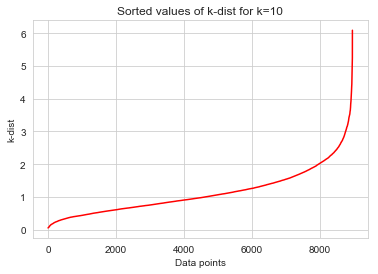

In [69]:
plot_k_dist(dist_mat, 10)

In [70]:
try_DBSCAN(df_kmeans, 2.1,10)

         No. of data points
Cluster                    
-1                      405
 0                     8532
 1                       13


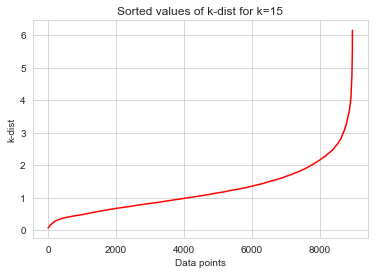

In [71]:
plot_k_dist(dist_mat, 15)

In [72]:
try_DBSCAN(df_kmeans, 2,15)

         No. of data points
Cluster                    
-1                      582
 0                     8368


We are either only getting 1 cluster and noise points or 1 very big cluster with small clusters and noise points.

### DBSCAN on PCA reduced dataset

In [73]:
dist_mat_pca = pd.DataFrame(squareform(pdist(df_kmeans.drop('kmeans_label', axis=1))), columns=df_kmeans.index, index=df_kmeans.index)
dist_mat_pca.head() 

CUST_ID    C10001    C10002    C10003    C10004    C10005    C10006    C10007  \
CUST_ID                                                                         
C10001   0.000000  4.388715  4.601460  2.379640  0.945785  2.441030  8.109140   
C10002   4.388715  0.000000  5.619594  3.892350  4.191693  4.560042  7.972699   
C10003   4.601460  5.619594  0.000000  4.222227  4.328650  4.190379  5.968954   
C10004   2.379640  3.892350  4.222227  0.000000  2.581349  3.303976  7.247366   
C10005   0.945785  4.191693  4.328650  2.581349  0.000000  2.370266  7.964843   

CUST_ID    C10008    C10009    C10010  ...    C19181    C19182    C19183  \
CUST_ID                                ...                                 
C10001   2.474035  1.999603  3.148678  ...  6.085153  8.208290  5.075463   
C10002   4.722524  3.960622  4.464593  ...  7.211437  5.960489  6.708650   
C10003   3.719546  3.588484  4.277803  ...  6.947592  8.167456  6.085091   
C10004   3.351286  1.876330  1.495955  ...  6.694987  7.566708  5.787120   
C10005   2.462372  1.779043  3.432175  ...  6.138006  8.149708  5.135203   

CUST_ID    C19184    C19185    C19186    C19187    C19188    C19189    C19190  
CUST_ID                                                                        
C10001   4.717385  4.754042  5.291508  5.007937  4.859530  4.672143  5.577698  
C10002   6.571698  6.273345  6.767866  6.746601  6.564728  6.122980  6.827442  
C10003   6.504153  5.545947  6.269533  6.032431  6.144013  6.724819  5.589757  
C10004   5.102186  4.867582  5.983573  5.732972  5.487314  5.209045  5.656319  
C10005   4.991975  4.773471  5.350806  5.071349  5.014428  4.740172  5.672882  

[5 rows x 8950 columns]

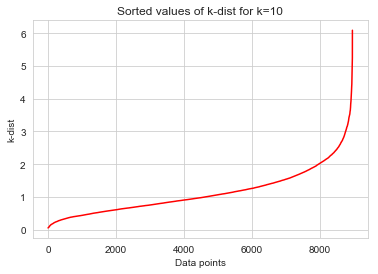

In [74]:
plot_k_dist(dist_mat_pca, 10)

In [75]:
try_DBSCAN(df_pca, 2,10)

         No. of data points
Cluster                    
-1                      708
 0                     8242


Again, DBSCAN is not able to cluster the data into well-defined clusters.

### Conclusions

* Kmeans algorithm gave maximum Silhouette score of 0.25 for 3 clusters (k=3). Treatment of outliers and correlated variables was an important pre-processing step.
* The algorithm performed efficiently and the need to do post-processing of the clusters did not arise.
* Domain knowledge is required to better interpret the obtained clusters.
* Using PCA to make the features independent is an option to treat multi-collinearity and preserve information, but then it becomes difficult to interpret the clusters.
* DBSCAN failed probably because of presence of large no. of outliers which were being treated as noise or perhaps the natural clusters were of different densities.

### Next Steps
* Proximity metrics other than Euclidean distance, like Shared Nearest Neighbor (SNN) similarity, Manhattan distance, Mahalanobis distance, Braycurtis distance etc can be tried out and clustering performance analyzed.
* Other techniques for handling missing values and outliers can be explored.

***